In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pathlib

#### Vehicle Registrations - Zip Codes

In [2]:
### Chicago Zip Code Boundaries
filename = 'data/Boundaries - ZIP Codes/geo_export_f8d86540-494c-4589-b6fe-011a8e48a2a7.shp'
df = gpd.read_file(filename)
df['zip'] = df['zip'].astype(np.int64)
df.set_index('zip')

,objectid,shape_area,shape_len,geometry
zip,,,,
60647,33.0,1.060523e+08,42720.044406,"POLYGON ((-87.67762 41.91776, -87.67761 41.917..."
60639,34.0,1.274761e+08,48103.782721,"POLYGON ((-87.72683 41.92265, -87.72693 41.922..."
60707,35.0,4.506904e+07,27288.609612,"POLYGON ((-87.78500 41.90915, -87.78531 41.909..."
60622,36.0,7.085383e+07,42527.989679,"POLYGON ((-87.66707 41.88885, -87.66707 41.888..."
60651,37.0,9.903962e+07,47970.140153,"POLYGON ((-87.70656 41.89555, -87.70672 41.895..."
...,...,...,...,...
60623,57.0,1.552855e+08,53406.915617,"POLYGON ((-87.69479 41.83008, -87.69486 41.830..."
60629,58.0,2.111148e+08,58701.325375,"POLYGON ((-87.68306 41.75786, -87.68306 41.757..."
60620,59.0,2.116961e+08,58466.160298,"POLYGON ((-87.62373 41.72167, -87.62388 41.721..."


In [3]:
df.columns

Index(['objectid', 'shape_area', 'shape_len', 'zip', 'geometry'], dtype='object')

<AxesSubplot:>

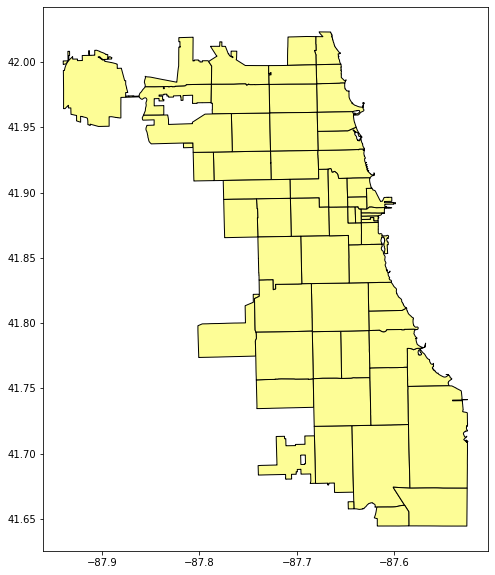

In [4]:
fig, ax = plt.subplots(figsize = (10,10))
plt.rcParams['figure.dpi'] = 100
df.plot(ax=ax, color='#FDFD96', edgecolor='black')  

In [5]:
### EV Registration - Zip Code
regisfile = 'data/EV_Registration_Jan2023/EV_Registrations_Jan2023.csv'
reg_df= pd.read_csv(regisfile)


Text(0.5, 1.0, 'EV Registration in Chicago City (Zip Code) - January 2023')

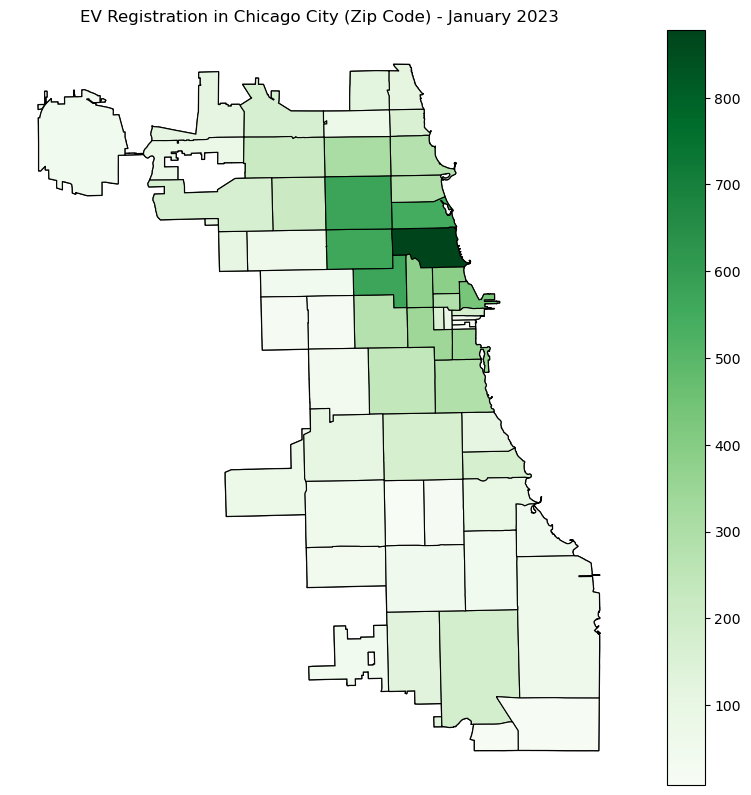

In [6]:
merge_df = df.merge(reg_df, on='zip')
gdf_EV = gpd.GeoDataFrame(merge_df)

fig, ax = plt.subplots(figsize = (10,10))
plt.rcParams['figure.dpi'] = 100
gdf_EV.plot(ax=ax, color='#FDFD96', edgecolor='black')  

gdf_EV.plot(column=gdf_EV['total_ev'], cmap='Greens', linewidth=0.8, ax=ax, edgecolor='black', legend=True)
ax.axis('off')
ax.set_title('EV Registration in Chicago City (Zip Code) - January 2023')

### Total Vehicles - Zip Codes

In [7]:
### ACS - Zip Code
vehfile = 'data/CensusData/vehicle_zip.csv'
veh_df= pd.read_csv(vehfile)

Text(0.5, 1.0, '% EV Share in Chicago City (Zip Code) - January 2023')

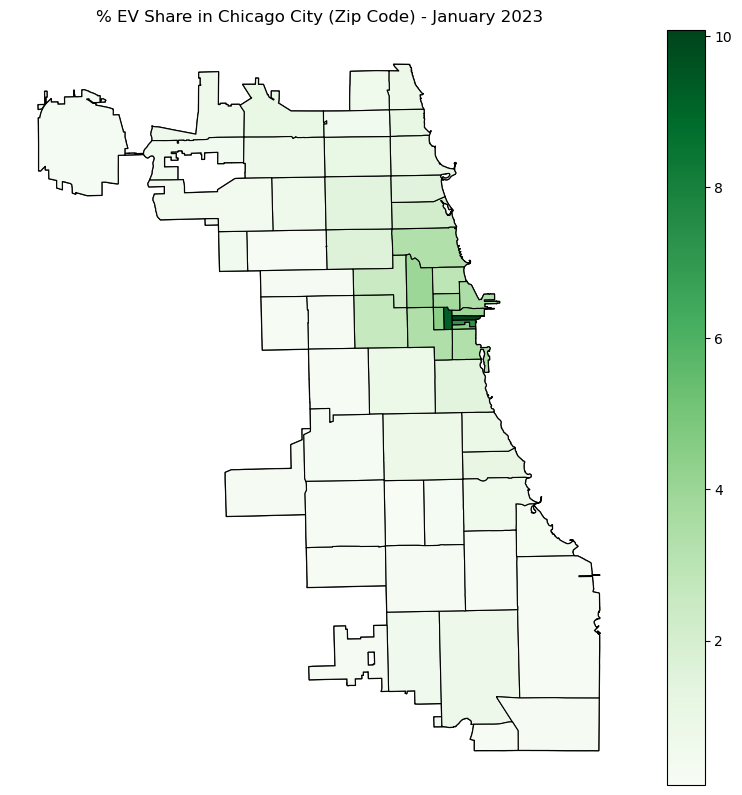

In [8]:
merge2_df = gdf_EV.merge(veh_df, on='zip')
gdf_allveh = gpd.GeoDataFrame(merge2_df)

fig, ax = plt.subplots(figsize = (10,10))
plt.rcParams['figure.dpi'] = 100
gdf_allveh.plot(ax=ax, color='#FDFD96', edgecolor='black')  

gdf_allveh.plot(column=1.2*gdf_allveh['total_ev']/gdf_allveh['veh_cnt']*100, cmap='Greens', linewidth=0.8, ax=ax, edgecolor='black', legend=True)
ax.axis('off')
ax.set_title('% EV Share in Chicago City (Zip Code) - January 2023')

### Share of Tesla

According to Assessment of Light-Duty Plug-in Electric Vehicles in the United States, 2010 – 2021 (ARGONE LAB)
https://publications.anl.gov/anlpubs/2022/11/178584.pdf

Sales shares of PEVs in the United States by manufacturer, 2011–2021

-> Tesla sales is 42.9% from all EV sales

### % EV Share in City of Chicago (Census Tracts)

<AxesSubplot:>

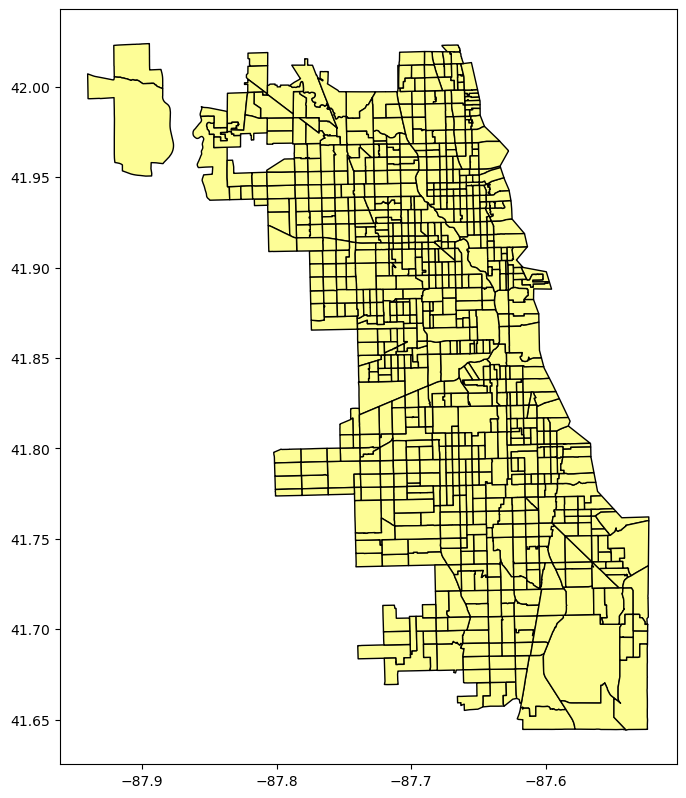

In [9]:
### Chicago Census Tract Boundaries
filename = 'data/Boundaries - Census Tracts - 2010-2/geo_export_956feb14-3473-4b2f-9559-8084b55ff017.shp'
tract_df = gpd.read_file(filename)
tract_df.rename(columns={'geoid10': 'geocode'}, inplace=True)
tract_df.set_index('geocode')

fig, ax = plt.subplots(figsize = (10,10))
plt.rcParams['figure.dpi'] = 100
tract_df.plot(ax=ax, color='#FDFD96', edgecolor='black')  

In [10]:
# Calculate Area for zip and tract (not actual area, but polygon area) 
gdf_allveh['area_zip']=gdf_allveh.area
tract_df['area_tract'] = tract_df.area

/var/folders/5r/n1w60bb93952_592_cx2r4tw0000gn/T/ipykernel_28669/2278574933.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_allveh['area_zip']=gdf_allveh.area
/var/folders/5r/n1w60bb93952_592_cx2r4tw0000gn/T/ipykernel_28669/2278574933.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tract_df['area_tract'] = tract_df.area


In [11]:
data_merged = gpd.sjoin(tract_df, gdf_allveh, how="left")
data_merged['geocode'] = data_merged['geocode'].astype(np.int64)
data_merged.set_index('geocode')

,commarea,commarea_n,countyfp10,name10,namelsad10,notes,statefp10,tractce10,geometry,area_tract,...,hh_own_3_vh,hh_own_4_vh,hh_own_5_vh,hh_rent_0_vh,hh_rent_1_vh,hh_rent_2_vh,hh_rent_3_vh,hh_rent_4_vh,hh_rent_5_vh,area_zip
geocode,,,,,,,,,,,,,,,,,,,,,
17031842400,44,44.0,031,8424,Census Tract 8424,None,17,842400,"POLYGON ((-87.62405 41.73022, -87.62405 41.730...",0.000213,...,1321.0,295.0,42.0,5921.0,5890.0,1271.0,324.0,34.0,29.0,0.002129
17031842400,44,44.0,031,8424,Census Tract 8424,None,17,842400,"POLYGON ((-87.62405 41.73022, -87.62405 41.730...",0.000213,...,1231.0,359.0,88.0,7186.0,6897.0,1395.0,172.0,26.0,0.0,0.001688
17031840300,59,59.0,031,8403,Census Tract 8403,None,17,840300,"POLYGON ((-87.68608 41.82296, -87.68607 41.823...",0.000090,...,2198.0,905.0,258.0,2997.0,5884.0,2177.0,430.0,82.0,14.0,0.002132
17031840300,59,59.0,031,8403,Census Tract 8403,None,17,840300,"POLYGON ((-87.68608 41.82296, -87.68607 41.823...",0.000090,...,1105.0,208.0,26.0,5480.0,8056.0,2632.0,538.0,45.0,76.0,0.001778
17031840300,59,59.0,031,8403,Census Tract 8403,None,17,840300,"POLYGON ((-87.68608 41.82296, -87.68607 41.823...",0.000090,...,787.0,293.0,157.0,4875.0,6514.0,2104.0,289.0,152.0,15.0,0.002149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17031130300,13,13.0,031,1303,Census Tract 1303,None,17,130300,"POLYGON ((-87.71436 41.98300, -87.71472 41.982...",0.000078,...,734.0,157.0,68.0,1335.0,4102.0,1790.0,425.0,40.0,0.0,0.000704
17031130300,13,13.0,031,1303,Census Tract 1303,None,17,130300,"POLYGON ((-87.71436 41.98300, -87.71472 41.982...",0.000078,...,681.0,203.0,77.0,5472.0,9349.0,3305.0,428.0,58.0,17.0,0.001068
17031292200,29,29.0,031,2922,Census Tract 2922,None,17,292200,"POLYGON ((-87.71317 41.85523, -87.71357 41.855...",0.000043,...,1393.0,432.0,153.0,5661.0,8077.0,2172.0,440.0,189.0,51.0,0.001564


In [12]:
### ACS - Zip Code
latchfile = 'data/CensusData/latch_2017-b.csv'
latch_df= pd.read_csv(latchfile)

In [13]:
merge3_df = gpd.GeoDataFrame(data_merged.merge(latch_df, on='geocode'))
merge3_df = merge3_df.drop_duplicates(subset='geocode')


In [14]:
tract_data = merge3_df[['geocode','name10',
                        'namelsad10','statefp10','tractce10',
                        'geometry','area_zip', 'area_tract','index_right','objectid','shape_area',
                        'shape_len','zip','total_ev','veh_cnt','hh_total','hh_cnt'
                       ]].copy()

In [15]:
tract_data.columns

Index(['geocode', 'name10', 'namelsad10', 'statefp10', 'tractce10', 'geometry',
       'area_zip', 'area_tract', 'index_right', 'objectid', 'shape_area',
       'shape_len', 'zip', 'total_ev', 'veh_cnt', 'hh_total', 'hh_cnt'],
      dtype='object')

In [16]:
tract_data['ratio'] = tract_data['hh_cnt']/tract_data['hh_total']

for i in range(len(tract_data)):
    try:
        if tract_data['hh_cnt'][i] > tract_data['hh_total'][i]:
            if tract_data['area_tract'][i] > tract_data['area_zip'][i]:
                tract_data['ratio'][i] = 0.8
            else:
                tract_data['ratio'][i] = tract_data['area_tract'][i]/tract_data['area_zip'][i]
    except:
        pass
        
        
tract_data['veh_cnt_tract']=tract_data['ratio']*tract_data['veh_cnt']
tract_data['ev_cnt_tract']=tract_data['ratio']*tract_data['total_ev']

        

/var/folders/5r/n1w60bb93952_592_cx2r4tw0000gn/T/ipykernel_28669/4219104497.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tract_data['ratio'][i] = 0.8


In [17]:
tract_data[tract_data['ratio']==tract_data['ratio'].max()]

,geocode,name10,namelsad10,statefp10,tractce10,geometry,area_zip,area_tract,index_right,objectid,shape_area,shape_len,zip,total_ev,veh_cnt,hh_total,hh_cnt,ratio,veh_cnt_tract,ev_cnt_tract
326,17031081403,814.03,Census Tract 814.03,17,081403,"POLYGON ((-87.60953 41.89096, -87.60484 41.891...",0.000049,0.000197,41,26.0,4.847125e+06,14448.174993,60602,41,488.0,581.0,5128,0.8,390.4,32.8
684,17031320400,3204,Census Tract 3204,17,320400,"POLYGON ((-87.61644 41.88233, -87.60925 41.882...",0.000043,0.000158,29,48.0,4.294902e+06,12245.808402,60604,9,238.0,401.0,587,0.8,190.4,7.2


Text(0.5, 1.0, 'Total Vehicles in Chicago City (Census Tract) - January 2023')

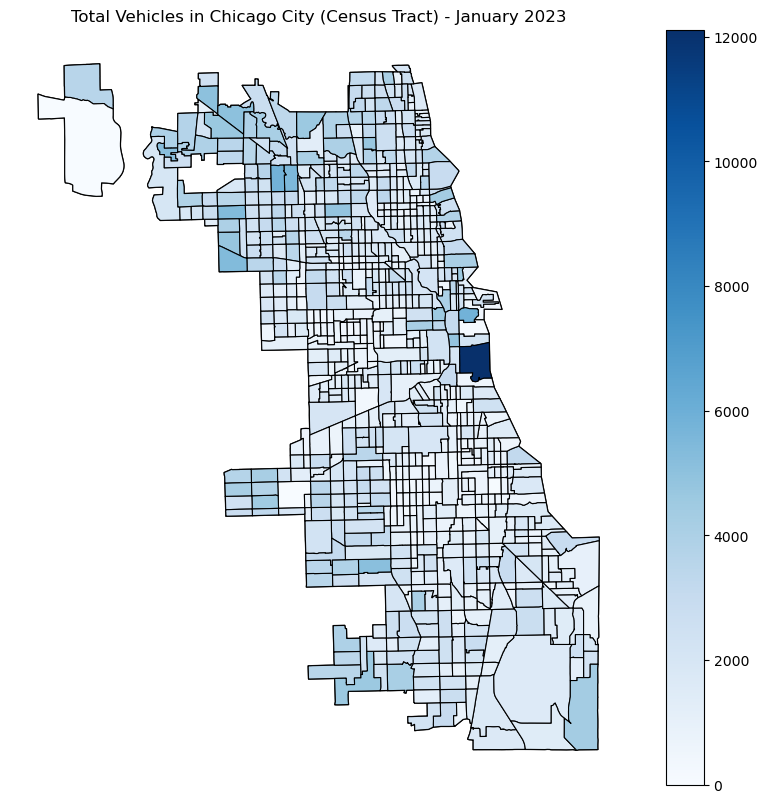

In [18]:
fig, ax = plt.subplots(figsize = (10,10))
plt.rcParams['figure.dpi'] = 100
tract_data.plot(ax=ax, color='white', edgecolor='black')  

tract_data.plot(column=1.15*tract_data['veh_cnt_tract'], cmap='Blues', linewidth=0.8, ax=ax, edgecolor='black', legend=True)
ax.axis('off')
ax.set_title('Total Vehicles in Chicago City (Census Tract) - January 2023')

Text(0.5, 1.0, 'Total Gasoline Vehicles in Chicago City - January 2023')

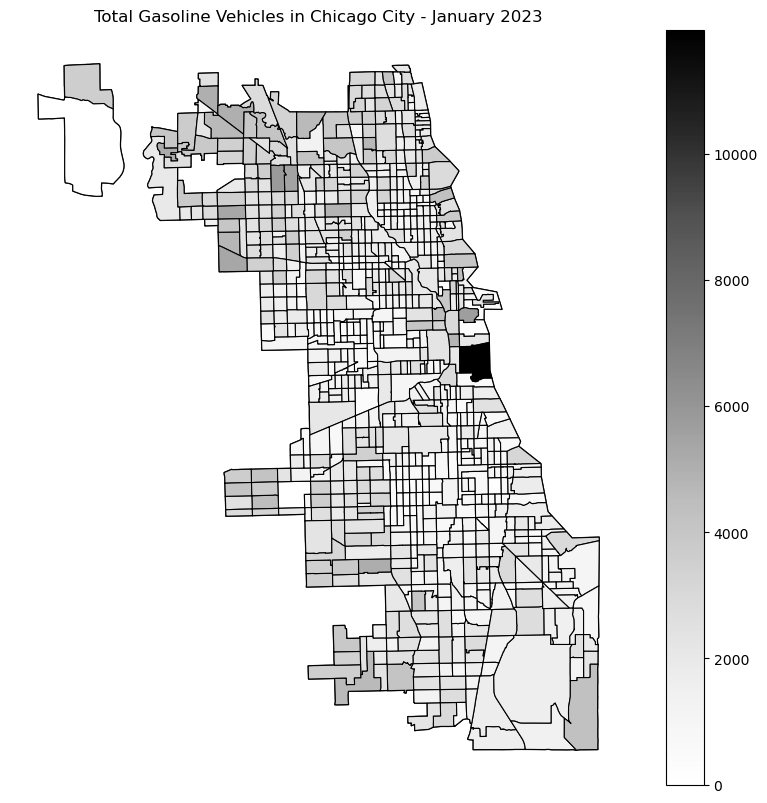

In [27]:
fig, ax = plt.subplots(figsize = (10,10))
plt.rcParams['figure.dpi'] = 100
tract_data.plot(ax=ax, color='white', edgecolor='black')  

tract_data.plot(column=(tract_data['veh_cnt_tract']-tract_data['ev_cnt_tract'])*1.15, cmap='Greys', linewidth=0.8, ax=ax, edgecolor='black', legend=True)
ax.axis('off')
ax.set_title('Total Gasoline Vehicles in Chicago City - January 2023')

Text(0.5, 1.0, 'Total EVs in Chicago City - January 2023')

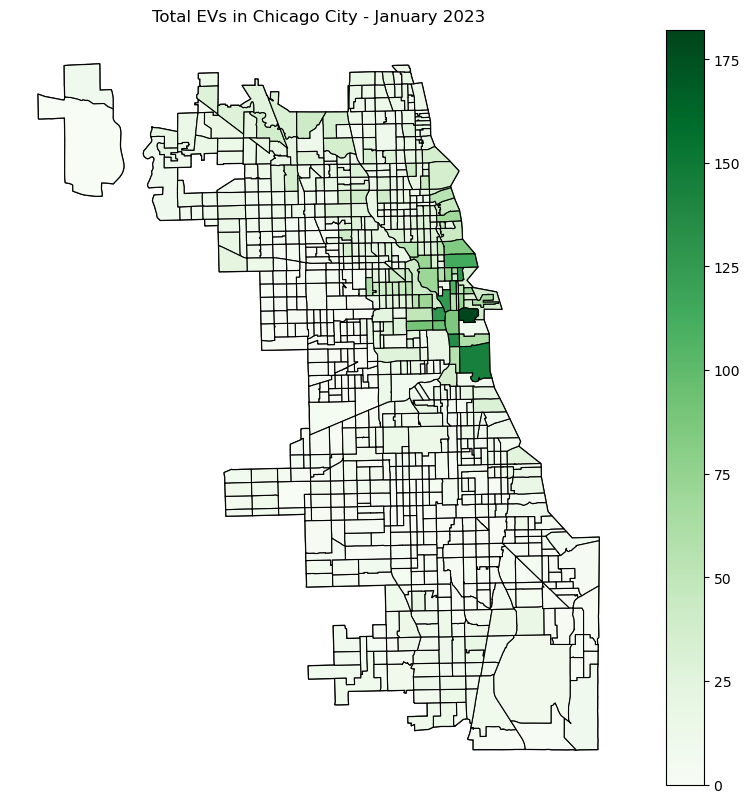

In [28]:
fig, ax = plt.subplots(figsize = (10,10))
plt.rcParams['figure.dpi'] = 100
tract_data.plot(ax=ax, color='white', edgecolor='black')  

tract_data.plot(column=1.15*tract_data['ev_cnt_tract'], cmap='Greens', linewidth=0.8, ax=ax, edgecolor='black', legend=True)
ax.axis('off')
ax.set_title('Total EVs in Chicago City - January 2023')

Text(0.5, 1.0, '% EV Driver Share in Chicago City - January 2023')

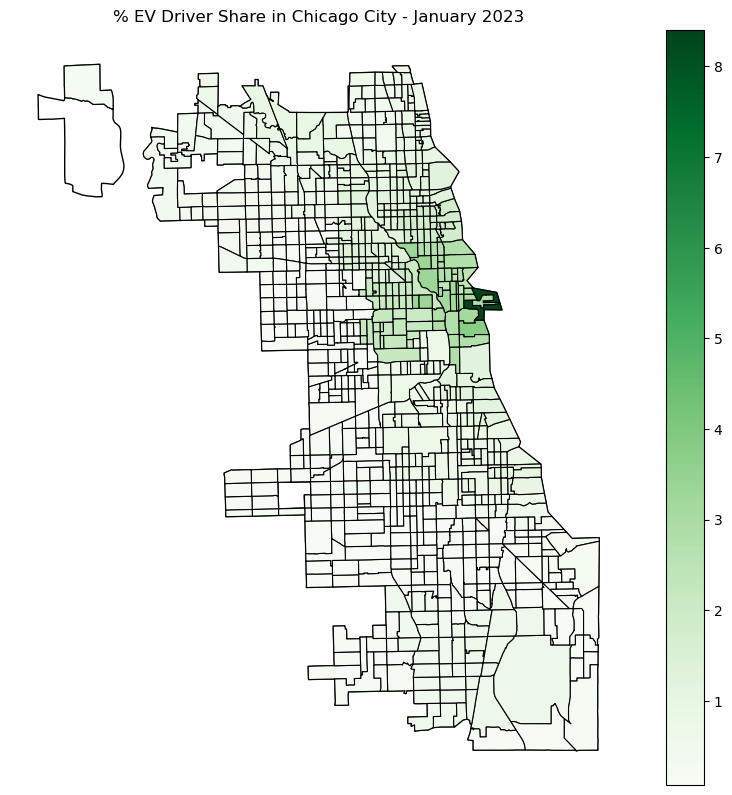

In [29]:
fig, ax = plt.subplots(figsize = (10,10))
plt.rcParams['figure.dpi'] = 100
tract_data.plot(ax=ax, color='white', edgecolor='black')  

tract_data.plot(column=tract_data['ev_cnt_tract']/tract_data['veh_cnt_tract']*100, cmap='Greens', linewidth=0.8, ax=ax, edgecolor='black', legend=True)
ax.axis('off')
ax.set_title('% EV Driver Share in Chicago City - January 2023')

### Centroid Position of Vehicle Demand

In [22]:
tract_data_point = tract_data.copy()

/var/folders/5r/n1w60bb93952_592_cx2r4tw0000gn/T/ipykernel_28669/2579683141.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tract_data_point.centroid.plot(ax=ax, color='red', markersize = 2, label = 'centroid')


Text(0.5, 1.0, 'Census Tract Centroid and Boundaries of Chicago City')

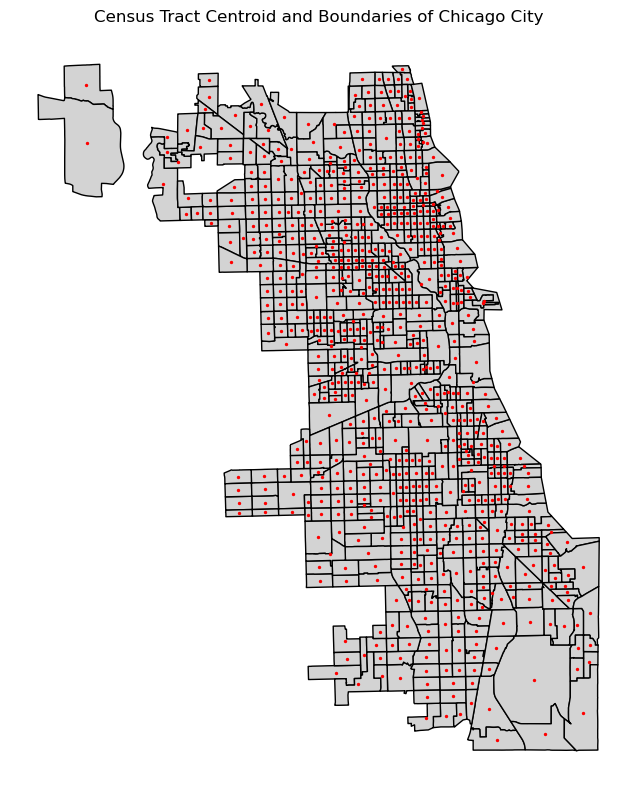

In [25]:
plt.rcParams['figure.dpi'] = 100
ax = tract_data_point.plot(color='lightgrey', edgecolor='black',figsize = (10,10))  
tract_data_point.centroid.plot(ax=ax, color='red', markersize = 2, label = 'centroid')
ax.axis('off')
plt.title('Census Tract Centroid and Boundaries of Chicago City')
